In [42]:
import numpy as np
import os
import math
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats
import seaborn as sns

plt.rcParams.update({'font.size': 15})

from matplotlib.lines import Line2D
from tqdm import tqdm
tqdm.pandas()

In [22]:
logs = pd.read_csv('logs_graph.txt', sep = '\t', header = None)

In [87]:
manually_discarded = ['eury_eury_c19056_g1_i1',
'octo_c45723_g1_i1',
'eury_eury_c21411_g1_i1',
'octo_c83095_g1_i1',
'octo_c70498_g1_i1',
'eury_eury_c23417_g1_i1',
'eury_eury_c24564_g1_i1',
'octo_c3808_g1_i1',
'octo_c3047_g1_i1',
'eury_eury_c27252_g1_i1',
'eury_eury_c27478_g1_i1',
'octo_c7_g1_i1',
'eury_eury_c29036_g1_i1',
'octo_c33122_g1_i1',
'octo_c8745_g1_i2',
'eury_eury_c4590_g1_i2',
'foca_c10387_g2_i1',
'octo_c4714_g1_i1',
'eury_eury_c20351_g1_i1',
'raik_c10821_g1_i1',
'raik_c8827_g1_i1',
'eury_eury_c23982_g1_i1',
'raik_c41277_g1_i1',
'rari_c13025_g1_i1',
'cras_c22558_g1_i1',
'minu_c10890_g1_i1',
'rari_c23478_g1_i1',
'minu_c384_g1_i1',
'cras_c31199_g1_i1',
'minu_c38337_g1_i1',
'rari_c5396_g1_i1',
'minu_c118_g1_i1',
'cras_comp14802_c0_seq1',
'rari_c1915_g1_i1',
'minu_c24735_g1_i1',
'minu_c23467_g1_i1',
'rari_c23928_g1_i1',
'rari_c28902_g1_i1',
'minu_c35102_g1_i1']


## A2+A5. Properties of main frame

In [90]:
logs = logs[~logs[0].isin(manually_discarded)]
log_main = logs[logs[4] == 'main'].copy()
log_main[11] = log_main[11].astype(float)
log_main[6] = log_main[6].astype(float)

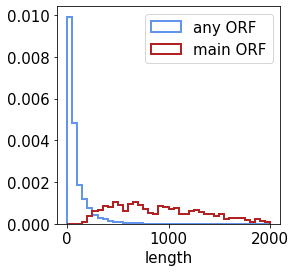

In [268]:
plt.figure(figsize = (4, 4))

temp = logs[logs[4] != 'main']
x = temp[3]
plt.hist(x, bins = 40, range = (0, 2000), alpha = 1, color = 'cornflowerblue', 
         density = True, histtype = 'step', linewidth = 2, label = 'any ORF')
x = logs.loc[logs[4] == 'main'][3]
plt.hist(x, bins = 40, range = (0, 2000), alpha = 1, color = 'firebrick',
         density = True, histtype = 'step', linewidth = 2, label = 'main ORF')
plt.xlabel('length')
plt.legend()
plt.show()

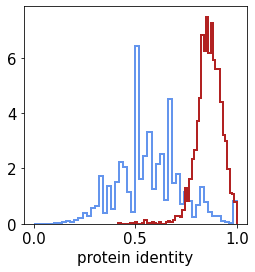

In [190]:
plt.figure(figsize = (4, 4))
temp = logs[logs[4] != 'main']
x = temp[6].replace('None', np.nan).dropna().astype(float)
plt.hist(x, bins = 50, color = 'cornflowerblue', histtype = 'step', linewidth = 2, density = True)
plt.hist(log_main[6], bins = 50, color = 'firebrick', histtype = 'step', linewidth = 2, density = True)
plt.xlabel('protein identity')
plt.axvline(0.85, color = 'grey', linestyle = '--')
plt.show()

In [158]:
def GetLowestdNdS(dnds_info):
    if not dnds_info:
        return np.nan
    if type(dnds_info) == float:
        return np.nan
    splitted = list(map(float, dnds_info.split(',')))
    return min(splitted[::6])
    
    
logs['lowest_dnds'] = logs.progress_apply(lambda row: GetLowestdNdS(row[15]), axis = 1)




100%|██████████| 32879/32879 [00:00<00:00, 83552.37it/s]
<ipython-input-158-48f1c74c2e6e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logs['lowest_dnds'] = logs.progress_apply(lambda row: GetLowestdNdS(row[15]), axis = 1)


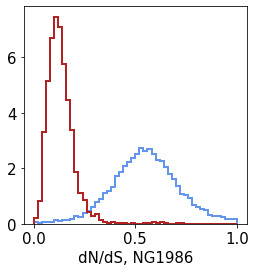

In [188]:
plt.figure(figsize = (4, 4))
temp = logs[logs[4] != 'main']
x = temp['lowest_dnds'].replace('None', np.nan).dropna().astype(float)
plt.hist(x, bins = 50, range = (0, 1), color = 'cornflowerblue', histtype = 'step', linewidth = 2, density = True)
plt.hist(log_main['lowest_dnds'].astype(float), range = (0, 1),  bins = 50, color = 'firebrick', histtype = 'step', linewidth = 2, density = True)
plt.xlabel('dN/dS, NG1986')
plt.show()

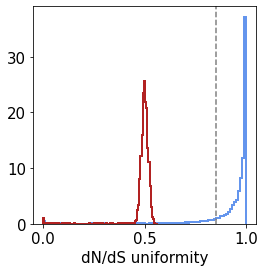

In [192]:
plt.figure(figsize = (4,  4))
temp = logs[logs[4] != 'main']
x = temp[13].replace('None', np.nan).dropna().astype(float)
plt.hist(x, bins = 100, color = 'cornflowerblue', histtype = 'step', linewidth = 2, density = True)
plt.hist(log_main[13].astype(float), bins = 100, color = 'firebrick', histtype = 'step', linewidth = 2, density = True)
plt.xlabel('dN/dS uniformity')
plt.axvline(0.85, color = 'grey', linestyle = '--')
plt.show()

## A1. Mammals: Distributions of Z-scores calculated for terminal protein regions

In [217]:
ends = pd.read_csv('./mammals/ends_vbigsigma.txt', sep = ' ')
ends['z'] = ( ends['av'] - ends['m'])/ends['sg']
normal_zds = np.random.normal(loc=0.0, size=100000)

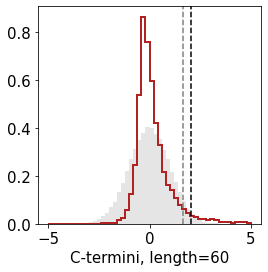

In [265]:
N = 60
temp = ends[ends['len'] ==N]

plt.figure(figsize = (4, 4))
x = temp['z'].replace(np.inf, np.nan).dropna()
plt.hist(x, range = (-5, 5), bins = 50, density = True, histtype = 'step', 
        linewidth = 2, color = 'firebrick')
v = np.quantile(x, 0.95)
plt.axvline(v, color = 'black', linestyle = '--' )
plt.hist((normal_zds), range = (-5, 5), bins = 50, density = True, 
         histtype = 'stepfilled', color = 'grey', alpha = 0.2)
v = np.quantile(normal_zds, 0.95)
plt.axvline(v, color = 'grey', linestyle = '--')
plt.xlabel('C-termini, length=' + str(N))
plt.show()

In [255]:
starts = pd.read_csv('./mammals/starts_vbigsigma.txt', sep = ' ')
starts['z'] = ( starts['av'] - starts['m'])/starts['sg']

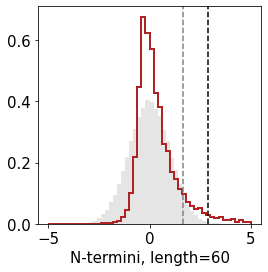

In [267]:
N = 60
temp = starts[starts['len'] == N]
x = temp['z'].replace(np.inf, np.nan).dropna()

plt.figure(figsize = (4, 4))

plt.hist(x, range = (-5, 5), bins = 50, density = True, histtype = 'step', 
        linewidth = 2, color = 'firebrick')
v = np.quantile(x, 0.95)
plt.axvline(v, color = 'black', linestyle = '--' )
plt.hist((normal_zds), range = (-5, 5), bins = 50, density = True, 
         histtype = 'stepfilled', color = 'grey', alpha = 0.2)
v = np.quantile(normal_zds, 0.95)
plt.axvline(v, color = 'grey', linestyle = '--')
plt.xlabel('N-termini, length=' + str(N))

plt.show()

## A4. Number of frameshifts depending on the length threshold

In [275]:
directory = '../data/nuc_alignments/'

with open('./algorithm_analysis/idr_to_filename.txt', 'w') as fout:
    for filename in os.listdir(directory):
        path = directory + filename
        with open(path, 'r') as fin:
            for line in fin:
                if line[:2] == '> ':
                    idr = line.strip().split()[1]
                    
                    fout.write(idr + ' ' + filename + '\n')
                elif line[0] == '>':
                    idr = line[1:].strip().split()[0]
                    
                    fout.write(idr + ' ' + filename + '\n')



In [278]:

logs_named = logs.rename(columns = {0:'idr', 
1:'start', #in alignment
2:'end', # in alignment
3:'length', # in bp
4:'tomain', # main/3/5
5:'is3', #true/false
6:'biggest_prot_ID', # only float value
7:'best_prot_ID', # id,same,ungapped - and bigget ungapped
8:'all_id_data', # id,same,ungapped x as many times as calculated
9:'fits_ID', # true/false
10:'bestfit_prot_ID', 
11:'best_pnps', # for main
12:'best_counting_list', # for main
13:'fit_best_pnps', # a float from 0 to 1  - fitting_value
14:'pnps_fit_list', # all calculated fiiting_value s
15:'all_pnps' # dnds,nd,N,sd,S,fitting_value x as many times as calculated
})

logs_named



,idr,start,end,length,tomain,is3,biggest_prot_ID,best_prot_ID,all_id_data,fits_ID,bestfit_prot_ID,best_pnps,best_counting_list,fit_best_pnps,pnps_fit_list,all_pnps,lowest_dnds
0,minu_c17664_g1_i2,1215,1782,567,3,False,0.892215568862,"0.892215568862,149,167","0.264957264957,31,117,0.722222222222,13,18,0.5...",True,0.892215568862,None,None,0.842,"1.0,1.0,0.935,0.995,0.842,0.998,1.0,0.999,0.99...","0.656320204443,245.166666667,453.166666667,93....",0.092258
1,minu_c17664_g1_i2,1332,1782,450,3,True,None,None,None,False,None,None,None,0.331,"0.331,0.994,0.999,1.0,0.995,1.0,1.0,1.0,1.0,1.0","0.0584735948236,18.5,365.166666667,73.5,84.833...",0.058474
2,minu_c17664_g1_i2,1800,1842,42,5,False,0.833333333333,"0.571428571429,4,7","0.571428571429,4,7,0.833333333333,5,6",False,0,None,None,0.998,"0.999,1.0,0.998","0.83850931677,13.5,34.5,3.5,7.5,0.999,2.124352...",0.522552
3,minu_c17664_g1_i2,1845,1896,51,5,False,0.529411764706,"0.529411764706,9,17","0.3,3,10,0.529411764706,9,17",False,0,None,None,0.998,"1.0,0.998,1.0","0.562910381544,17.3333333333,40.8333333333,7.6...",0.562910
4,minu_c17664_g1_i2,1899,1980,81,5,False,0.608695652174,"0.608695652174,14,23","0.214285714286,3,14,0.608695652174,14,23,0.153...",False,0,None,None,0.999,"1.0,0.999,1.0,1.0","0.7936,42.6666666667,62.5,13.3333333333,15.5,1...",0.779923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33183,minu_c13546_g1_i1,15,108,93,5,False,0.166666666667,"0.166666666667,3,18","0.166666666667,3,18",False,0,None,None,1.0,1.0,"0.982532751092,45.0,76.3333333333,10.0,16.6666...",0.982533
33184,minu_c13546_g1_i1,411,567,156,3,False,0.636363636364,"0.375,6,16","0.375,6,16,0.636363636364,7,11",False,0,None,None,1.0,1.0,"0.774261548471,70.5,120.833333333,26.5,35.1666...",0.774262
33185,minu_c13546_g1_i1,567,567,0,3,True,None,None,None,False,None,None,None,None,None,NaN,NaN
33186,minu_c13546_g1_i1,16,88,72,5,False,0.416666666667,"0.416666666667,5,12","0.416666666667,5,12",False,0,None,None,1.0,1.0,"0.610027855153,30.0,59.8333333333,10.0,12.1666...",0.610028


In [335]:
shift_num = list()
lengths = list()
shift_q_025 = list()
shift_q_975 = list()



for l_t in [5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24] + list(range(25, 155, 5)):
    lengths.append(l_t)
    filename = f'./algorithm_analysis/models/lengths_1000-1000_{l_t}-{l_t}.txt'
    file_table = pd.read_csv(filename, sep = ' ', header = None)
    shift_num_dist = list()
    file_table['shift_num'] = file_table.apply(lambda row: len(row[2].split(','))//2 - 1, axis = 1)
    shift_num.append(sum(file_table['shift_num']))
    for bootsrap_cycle in range(1000):
        sample = file_table.sample(frac=1, replace=True)
        shift_num_dist.append(sum(sample['shift_num']))
    shift_q_025.append(np.quantile(shift_num_dist, 0.025))
    shift_q_975.append(np.quantile(shift_num_dist, 0.975))


hard_thresh_table = pd.DataFrame()
hard_thresh_table['thr'] = lengths
hard_thresh_table['3shift_sum'] = shift_num 
hard_thresh_table['3q_025'] = shift_q_025
hard_thresh_table['3q_975'] = shift_q_975

In [336]:
shift_num = list()
lengths = list()
shift_q_025 = list()
shift_q_975 = list()



for l_t in [5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24] + list(range(25, 155, 5)):
    lengths.append(l_t)
    filename = f'./algorithm_analysis/models/lengths_{l_t}-{l_t}_1000-1000.txt'
    file_table = pd.read_csv(filename, sep = ' ', header = None)
    shift_num_dist = list()
    file_table['shift_num'] = file_table.apply(lambda row: len(row[2].split(','))//2 - 1, axis = 1)
    shift_num.append(sum(file_table['shift_num']))
    for bootsrap_cycle in range(1000):
        sample = file_table.sample(frac=1, replace=True)
        shift_num_dist.append(sum(sample['shift_num']))
    shift_q_025.append(np.quantile(shift_num_dist, 0.025))
    shift_q_975.append(np.quantile(shift_num_dist, 0.975))


hard_thresh_table['5shift_sum'] = shift_num 
hard_thresh_table['5q_025'] = shift_q_025
hard_thresh_table['5q_975'] = shift_q_975

(2.0, 9.0)

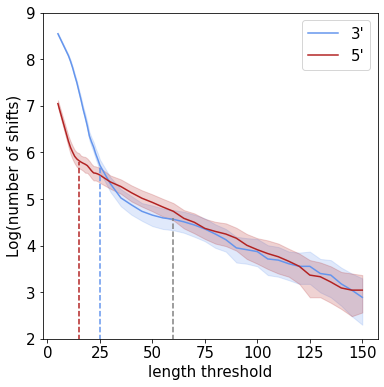

In [369]:
temp = hard_thresh_table

plt.figure(figsize = (6, 6))
plt.plot(temp['thr'], np.log(temp['3shift_sum']), color = 'cornflowerblue', linestyle = '-', label = "3'" )
plt.fill_between(temp['thr'],  np.log(temp['3q_025']), np.log(temp['3q_975']), color = 'cornflowerblue', alpha = 0.2)

plt.plot(temp['thr'],  np.log(temp['5shift_sum']), color = 'firebrick', linestyle = '-', label = "5'" )
plt.fill_between(temp['thr'],  np.log(temp['5q_025']), np.log(temp['5q_975']), color = 'firebrick', alpha = 0.2)



plt.plot([60, 60], [0, 4.6],  color = 'grey', linestyle = '--')
plt.plot([15, 15], [0, 5.8], color = 'firebrick', linestyle = '--')
plt.plot([25, 25], [0, 5.7], color = 'cornflowerblue', linestyle = '--')
plt.ylabel('Log(number of shifts)')
plt.xlabel('length threshold')
plt.legend()
plt.ylim(2, 9)


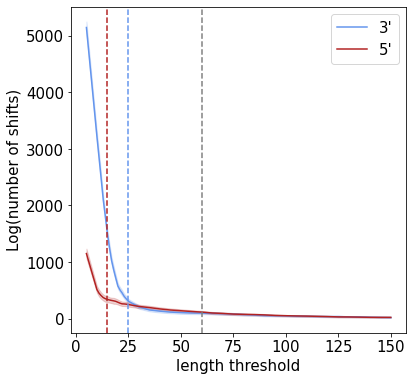

In [374]:
temp = hard_thresh_table

plt.figure(figsize = (6, 6))
plt.plot(temp['thr'], temp['3shift_sum'], color = 'cornflowerblue', linestyle = '-', label = "3'" )
plt.fill_between(temp['thr'],  temp['3q_025'], temp['3q_975'], color = 'cornflowerblue', alpha = 0.2)

plt.plot(temp['thr'],  temp['5shift_sum'], color = 'firebrick', linestyle = '-', label = "5'" )
plt.fill_between(temp['thr'],  temp['5q_025'], temp['5q_975'], color = 'firebrick', alpha = 0.2)



plt.axvline(60,  color = 'grey', linestyle = '--')
plt.axvline(15,  color = 'firebrick', linestyle = '--')
plt.axvline(25, color = 'cornflowerblue', linestyle = '--')
plt.ylabel('Log(number of shifts)')
plt.xlabel('length threshold')
plt.legend()
# plt.ylim(2, 9)


## A3. Distributions of added ORF identities with respect to ORF length threshold

In [423]:
id_dist_list = list()

def FindIdOfAdded(row):
    idr = row[1]
    main = list(map(int, row[5].split(',')))
    cod = list(map(int, row[4].split(',')))
    
    if len(cod) == 2:
        return []
    temp = logs[logs[0] == idr]
    temp = temp[temp[4] != 'main']
    temp = temp[temp[7] != 'None']
    temp = temp[temp[1].isin(cod) | temp[2].isin(cod)]

    identity = np.array(temp[7].str.split(','))
    ides = list()
    for elem in identity:
        ides.append(float(elem[0]))

    return ides

for l_t in [15, 25, 35, 60]:
    id_dist = list()
    filename = f'./algorithm_analysis/models/lengths_1000-1000_{l_t}-{l_t}.txt'
    file_table = pd.read_csv(filename, sep = ' ', header = None)
    for index, row in file_table.iterrows():
        id_dist.extend(FindIdOfAdded(row)) 
    id_dist_list.append(id_dist)


/home/sofya/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/sofya/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/sofya/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

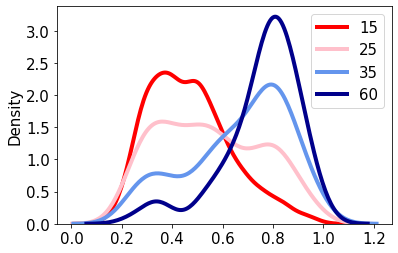

In [442]:
cols = ['red', 'pink', 'cornflowerblue', 'darkblue']
lens = [15, 25, 35, 60]
for i in range(4):
#     plt.hist(id_dist_list[i], bins = 20, range = (0, 1), histtype = 'stepfilled', alpha = 0.1, density = True)
    sns.distplot(id_dist_list[i], hist=False, kde=True, 
             bins=30, color = cols[i], 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, label = lens[i])

    
plt.legend()

In [443]:
id_dist_list = list()



for l_t in [15, 25, 35, 60]:
    id_dist = list()
    filename = f'./algorithm_analysis/models/lengths_{l_t}-{l_t}_1000-1000.txt'
    file_table = pd.read_csv(filename, sep = ' ', header = None)
    for index, row in file_table.iterrows():
        id_dist.extend(FindIdOfAdded(row)) 
    id_dist_list.append(id_dist)


/home/sofya/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/sofya/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/sofya/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

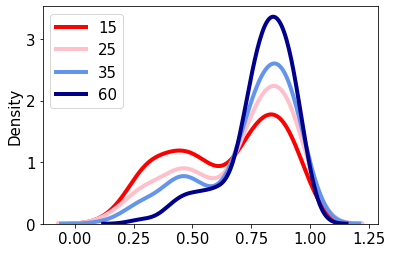

In [444]:
cols = ['red', 'pink', 'cornflowerblue', 'darkblue']
lens = [15, 25, 35, 60]
for i in range(4):
#     plt.hist(id_dist_list[i], bins = 20, range = (0, 1), histtype = 'stepfilled', alpha = 0.1, density = True)
    sns.distplot(id_dist_list[i], hist=False, kde=True, 
             bins=30, color = cols[i], 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, label = lens[i])

    
plt.legend()

## A6 | Receiver operating characteristic (ROC) curves built for parameters chosen for TR prediction. 

In [721]:
mp = pd.read_csv('./algorithm_analysis/models_parameter_vfin.txt', header = 0, delim_whitespace=True)
# mp = pd.read_csv('./untitled.txt', header = 0, delim_whitespace=True)

Text(0.5, 0, 'False positive rate')

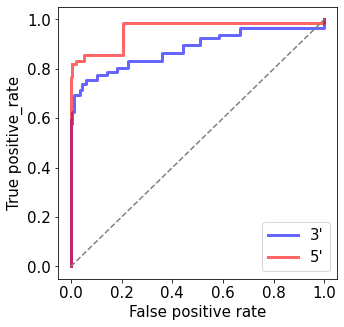

In [710]:
mp = pd.read_csv('./algorithm_analysis/models_parameter_vfin.txt', header = 0, delim_whitespace=True)


def DrawCurve(temp, col, Acol = 'A3', Bcol = 'B3', label = None):
    temp = temp[temp[ Acol] < 1]
    temp = temp.sort_values(by= Acol, axis=0)
    x =  [0] + list(temp[ Acol] ) + [1]
    y = [0] + list(1 - temp[Bcol] ) + [1]

#     plt.scatter(x, y, color = col, alpha = 0.5, label = label)
    plt.step(x, y, where='post', color = col, alpha = 0.6, linewidth = 3, label = label)
    


plt.figure(figsize = (5, 5))


temp = mp[mp['code'] == 'hard_length_3']
DrawCurve(temp, 'blue', Acol = 'A3', Bcol = 'B3', label = "3'" )


temp = mp[mp['code'] == 'hard_length_5']
DrawCurve(temp, 'red',  Acol = 'A5', Bcol = 'B5', label = "5'")

plt.legend()

plt.plot([0, 1], [0, 1], color = 'grey', linestyle = '--')

plt.ylabel('True positive_rate')
plt.xlabel('False positive rate')
# # # y = y.sort()
# # # codingsfilename, TN5, FP5, FN5, TP5, A5, B5, UN5, TN3, FP3, FN3, TP3, A3, B3, code 

In [720]:
mp

,codingsfilename,TN5,FP5,FN5,TP5,A5,B5,UN5,TN3,FP3,FN3,TP3,A3,B3,code
0,./models/lengths_1000-1000_5-1000.txt,1062,0,72,0,0.000000,1.000000,0,-190,1264,2,58,1.176909,0.033333,hard_length_3
1,./models/lengths_1000-1000_10-1000.txt,1062,0,72,0,0.000000,1.000000,0,280,794,2,58,0.739292,0.033333,hard_length_3
2,./models/lengths_1000-1000_11-1000.txt,1062,0,72,0,0.000000,1.000000,0,358,716,2,58,0.666667,0.033333,hard_length_3
3,./models/lengths_1000-1000_12-1000.txt,1062,0,72,0,0.000000,1.000000,0,444,627,4,59,0.585434,0.063492,hard_length_3
4,./models/lengths_1000-1000_13-1000.txt,1062,0,72,0,0.000000,1.000000,0,524,545,5,60,0.509822,0.076923,hard_length_3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,./models/lengths_15-1000-25-1000_min_id_0.5.txt,1057,1,19,57,0.000945,0.250000,2,772,296,11,55,0.277154,0.166667,min_id
90,./models/lengths_15-1000-25-1000_min_id_0.6.txt,1057,1,21,55,0.000945,0.276316,2,866,204,13,51,0.190654,0.203125,min_id
91,./models/lengths_15-1000-25-1000_min_id_0.7.txt,1057,1,23,53,0.000945,0.302632,2,970,99,29,36,0.092610,0.446154,min_id
92,./models/lengths_15-1000-25-1000_min_id_0.8.txt,1057,1,35,41,0.000945,0.460526,0,1021,49,42,22,0.045794,0.656250,min_id


In [719]:
mp[mp['codingsfilename'] == './models/lengths_15-1000_25-1000.txt']
temp

dot_row = mp[mp['codingsfilename'] == './models/lengths_15-1000_1000-1000.txt']
dot_row

,codingsfilename,TN5,FP5,FN5,TP5,A5,B5,UN5,TN3,FP3,FN3,TP3,A3,B3,code
48,./models/lengths_15-1000_1000-1000.txt,1049,8,14,63,0.007569,0.181818,8,1072,0,62,0,0.0,1.0,hard_length_5


,codingsfilename,TN5,FP5,FN5,TP5,A5,B5,UN5,TN3,FP3,FN3,TP3,A3,B3,code
48,./models/lengths_15-1000_1000-1000.txt,1049,8,14,63,0.007569,0.181818,8,1072,0,62,0,0.0,1.0,hard_length_5


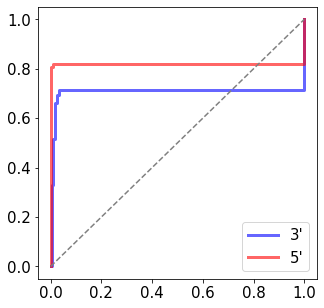

In [726]:

plt.figure(figsize = (5, 5))


temp = mp[mp['code'] == 'min_id']
DrawCurve(temp, 'blue', Acol = 'A3', Bcol = 'B3', label = "3'" )


temp = mp[mp['code'] == 'min_id']
DrawCurve(temp, 'red',  Acol = 'A5', Bcol = 'B5', label = "5'")
dot_row = mp[mp['codingsfilename'] == './models/lengths_15-1000_1000-1000.txt']
dot_row['A5']

plt.legend(loc='lower right')

plt.plot([0, 1], [0, 1], color = 'grey', linestyle = '--')

In [693]:
mp[mp['code'] == 'min_id']

,codingsfilename,TN5,FP5,FN5,TP5,A5,B5,UN5,TN3,FP3,FN3,TP3,A3,B3,code
137,./models/lengths_15-60-25-160_min_id_0.txt,1062,0,72,0,0.0,1.0,0,1072,0,62,0,0.0,1.0,min_id
138,./models/lengths_15-60-25-160_min_id_0.txt,1062,0,72,0,0.0,1.0,0,1072,0,62,0,0.0,1.0,min_id
139,./models/lengths_15-60-25-160_min_id_0.txt,1062,0,72,0,0.0,1.0,0,1072,0,62,0,0.0,1.0,min_id
140,./models/lengths_15-60-25-160_min_id_0.1.txt,1062,0,72,0,0.0,1.0,0,1072,0,62,0,0.0,1.0,min_id
141,./models/lengths_15-60-25-160_min_id_0.2.txt,1062,0,72,0,0.0,1.0,0,1072,0,62,0,0.0,1.0,min_id
142,./models/lengths_15-60-25-160_min_id_0.3.txt,1062,0,72,0,0.0,1.0,0,1072,0,62,0,0.0,1.0,min_id
143,./models/lengths_15-60-25-160_min_id_0.4.txt,1062,0,72,0,0.0,1.0,0,1072,0,62,0,0.0,1.0,min_id
144,./models/lengths_15-60-25-160_min_id_0.5.txt,1062,0,72,0,0.0,1.0,0,1072,0,62,0,0.0,1.0,min_id
145,./models/lengths_15-60-25-160_min_id_0.6.txt,1062,0,72,0,0.0,1.0,0,1072,0,62,0,0.0,1.0,min_id
146,./models/lengths_15-60-25-160_min_id_0.7.txt,1062,0,72,0,0.0,1.0,0,1072,0,62,0,0.0,1.0,min_id
